In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
df=pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()  #check for null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [7]:
df.describe()  #calculate statistical data on numerical column

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [8]:
a=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']
for i in a:
    iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
    upper_threshold = df[i].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[i].quantile(0.25) - (1.5 * iqr)
    print("{} lower threshold :{} and upper threshold :{}".format(i,lower_threshold, upper_threshold))

step lower threshold :-112.5 and upper threshold :603.5
amount lower threshold :-279608.29125 and upper threshold :501719.33875
oldbalanceOrg lower threshold :-160972.7625 and upper threshold :268287.9375
newbalanceOrig lower threshold :-216387.615 and upper threshold :360646.025
oldbalanceDest lower threshold :-1414555.06125 and upper threshold :2357591.76875
newbalanceDest lower threshold :-1667863.875 and upper threshold :2779773.125


In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
df.loc[(df['isFraud']==1)].head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.00,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1,0


In [12]:
df.groupby("type")['isFraud'].mean()*100

type
CASH_IN    0.00
CASH_OUT   0.18
DEBIT      0.00
PAYMENT    0.00
TRANSFER   0.77
Name: isFraud, dtype: float64

In [13]:
#(df.groupby("nameOrig")['isFraud'].mean()*100).sort_values().plot(kind='barh');

In [14]:
len(df['nameDest'].unique())

2722362

In [15]:
df['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [16]:
df.shape[0]

6362620

In [17]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00


In [18]:
new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [19]:
typeList = new_df.select_dtypes(include = "object").columns

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in typeList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in typeList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 509.7 MB
None


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(new_df)

,variables,VIF
0,step,3.22
1,type,2.56
2,amount,4.11
3,nameOrig,3.24
4,oldbalanceOrg,574.78
5,newbalanceOrig,580.81
6,nameDest,3.60
7,oldbalanceDest,73.55
8,newbalanceDest,85.14
9,isFraud,1.20


In [23]:
new_df['Actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_df['Actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_df['TransactionPath'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.22
1,amount,3.90
2,isFraud,1.19
3,isFlaggedFraud,1.00
4,Actual_amount_orig,1.32
5,Actual_amount_dest,3.77
6,TransactionPath,2.30


In [24]:
## Data Splitting

from sklearn.model_selection import train_test_split

X=new_df.drop(columns=['isFraud']).values
y=new_df['isFraud'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=3,stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))

(4453834, 6) (1908786, 6) (4453834,) (1908786,)
(array([0, 1], dtype=int64), array([4448085,    5749], dtype=int64))


In [25]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 

scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [26]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_train_balanced, y_train_balanced = smt.fit_resample(X_train_scaled, y_train)

In [27]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train_balanced,y_train_balanced) #magic happens - best values of betas - training/learning happens here

LogisticRegression()

In [28]:
y_pred=logistic_regression.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import roc_auc_score

lg_roc=roc_auc_score(y_test,logistic_regression.predict_proba(X_test_scaled)[:,1])
print(lg_roc)

0.9835161961589677


In [33]:
new_df.columns

Index(['type', 'amount', 'isFraud', 'isFlaggedFraud', 'Actual_amount_orig',
       'Actual_amount_dest', 'TransactionPath'],
      dtype='object')

In [34]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [39]:
coef=pd.DataFrame(logistic_regression.coef_.reshape(-1),[['type', 'amount', 'isFlaggedFraud', 'Actual_amount_orig',
       'Actual_amount_dest', 'TransactionPath']],["Coefficients"])
coef

,Coefficients
type,-0.17
amount,-35.87
isFlaggedFraud,1.39
Actual_amount_orig,13.72
Actual_amount_dest,6.28
TransactionPath,0.15


In [40]:
coef.reset_index(inplace=True)
coef["Coefficients"]=coef["Coefficients"].apply(lambda x:abs(x))
coef["Importnace"]=coef["Coefficients"].apply(lambda x:x/coef["Coefficients"].sum())

In [41]:
coef

,level_0,Coefficients,Importnace
0,type,0.17,0.00
1,amount,35.87,0.62
2,isFlaggedFraud,1.39,0.02
3,Actual_amount_orig,13.72,0.24
4,Actual_amount_dest,6.28,0.11
5,TransactionPath,0.15,0.00


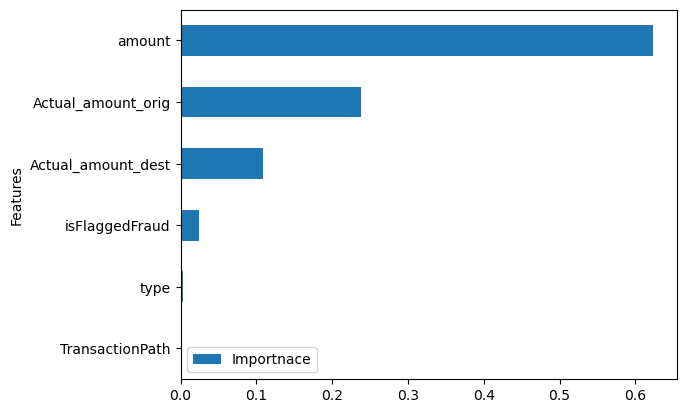

In [42]:
coef=coef.rename(columns={'level_0':'Features'})
coef.sort_values("Importnace",ascending=True,inplace=True)
coef.plot(kind='barh',y="Importnace",x="Features");

In [43]:
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler ## standrard scalig 
import warnings
warnings.filterwarnings("ignore")

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the pipeline that includes the KNN classifier and SMOTEENN
pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=11)),
    ('scaler', StandardScaler()),
    ('knn', knn)
])

# Define the parameter grid to search
param_grid = {'knn__n_neighbors': list(range(1,50))}

# Perform grid search using cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best parameter and score
print("Best parameter:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

KeyboardInterrupt: 